In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read in games.csv
games_df = pd.read_csv('data/games.csv')

# Remove not needed columns
games = games_df.loc[:, ~games_df.columns.str.contains('url', case=False)]

# Games that support English
games = games[games['Supported languages'].str.contains('english', case=False)]

# Remove columns
columns_to_remove = ['Supported languages','Required age','Positive','Negative','Score rank','Achievements','Website','Support email','Reviews','Header image','Full audio languages', 'Tags', 'Screenshots', 'Movies', 'About the game', 'Peak CCU', 'Notes']
games = games.drop(columns=columns_to_remove, errors='ignore')

# Make Estimated Owners average
# Extract minimum and maximum values using regular expressions
owners_range = games['Estimated owners'].str.extract(r'(\d+) - (\d+)')
min_owners = owners_range[0].astype(float)
max_owners = owners_range[1].astype(float)

# Calculate the average and replace the 'Estimated owners' column
games['Estimated owners'] = (min_owners + max_owners) / 2

In [65]:
games.head()

,AppID,Name,Release date,Estimated owners,Price,DLC count,Windows,Mac,Linux,Metacritic score,User score,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres
0,20200,Galactic Bowling,"Oct 21, 2008",10000.0,19.99,0,True,False,False,0,0,0,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports"
1,655370,Train Bandit,"Oct 12, 2017",10000.0,0.99,0,True,True,False,0,0,0,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie"
2,1732930,Jolt Project,"Nov 17, 2021",10000.0,4.99,0,True,False,False,0,0,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy"
3,1355720,Henosis™,"Jul 23, 2020",10000.0,5.99,0,True,True,True,0,0,0,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie"
4,1139950,Two Weeks in Painland,"Feb 3, 2020",10000.0,0.00,0,True,True,False,0,0,0,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie"


In [50]:
print(games.info())

<class 'pandas.core.frame.DataFrame'>
Index: 72562 entries, 0 to 78580
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       72562 non-null  int64  
 1   Name                        72558 non-null  object 
 2   Release date                72562 non-null  object 
 3   Estimated owners            72562 non-null  object 
 4   Price                       72562 non-null  float64
 5   DLC count                   72562 non-null  int64  
 6   Supported languages         72562 non-null  object 
 7   Windows                     72562 non-null  bool   
 8   Mac                         72562 non-null  bool   
 9   Linux                       72562 non-null  bool   
 10  Metacritic score            72562 non-null  int64  
 11  User score                  72562 non-null  int64  
 12  Recommendations             72562 non-null  int64  
 13  Average playtime forever    72562 no

In [10]:
all_games = pd.read_csv('data/all_games_cleaned.csv')

In [11]:
# Assuming your DataFrame is named df
missing_values = all_games.isnull().sum()

# Display the count of missing values for each column
print(missing_values)


appid                           0
name                            0
estimated_owners                0
price                           0
dlc_count                       0
windows                         0
mac                             0
linux                           0
metacritic_score                0
user_score                      0
achievements                    0
recommendations                 0
average_playtime_forever        0
average_playtime_two_weeks      0
median_playtime_forever         0
median_playtime_two_weeks       0
developers                      5
publishers                      3
genres                          4
tags                            8
single_player                   0
release_year                    0
players                         3
popular_tags                    0
recent_sentiment              267
recent_review_number          267
recent_positive_percentage    267
all_sentiment                  26
all_review_number              26
all_positive_p

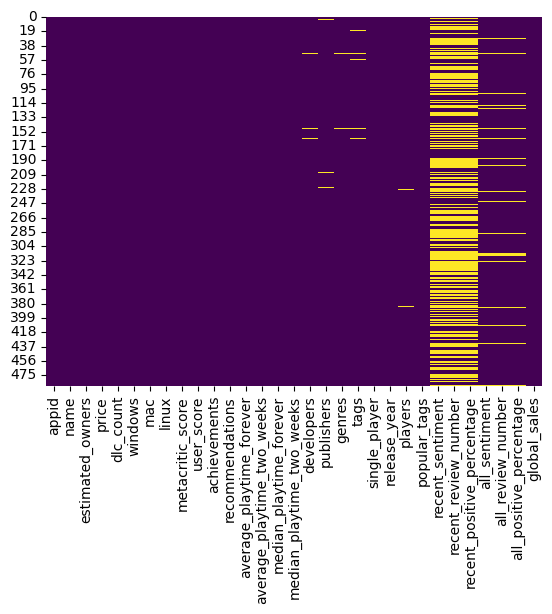

In [12]:
# Create a heatmap of missing values
sns.heatmap(all_games.isnull(), cbar=False, cmap='viridis')

# Display the plot
plt.show()

In [26]:
# Distribution of numerical features

## Apply log transformation to see non zero values
numerical_features = games.select_dtypes(include=[np.number]).drop('AppID', axis=1)
numerical_features_log = np.log1p(numerical_features)

numerical_features.describe()

,Estimated owners,Price,DLC count,Metacritic score,User score,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,7.256200e+04,72562.000000,72562.000000,72562.000000,72562.000000,7.256200e+04,72562.000000,72562.000000,72562.000000,72562.000000
mean,9.833556e+04,7.397417,0.609796,3.886883,0.044844,8.933873e+02,117.187522,11.915300,103.005016,12.727295
std,1.111204e+06,10.998770,14.839410,16.546118,1.905804,1.936557e+04,1171.135563,202.261396,1565.539326,217.962656
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000e+04,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.000000e+04,4.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.000000e+04,9.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,1.500000e+08,999.000000,2366.000000,97.000000,100.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000


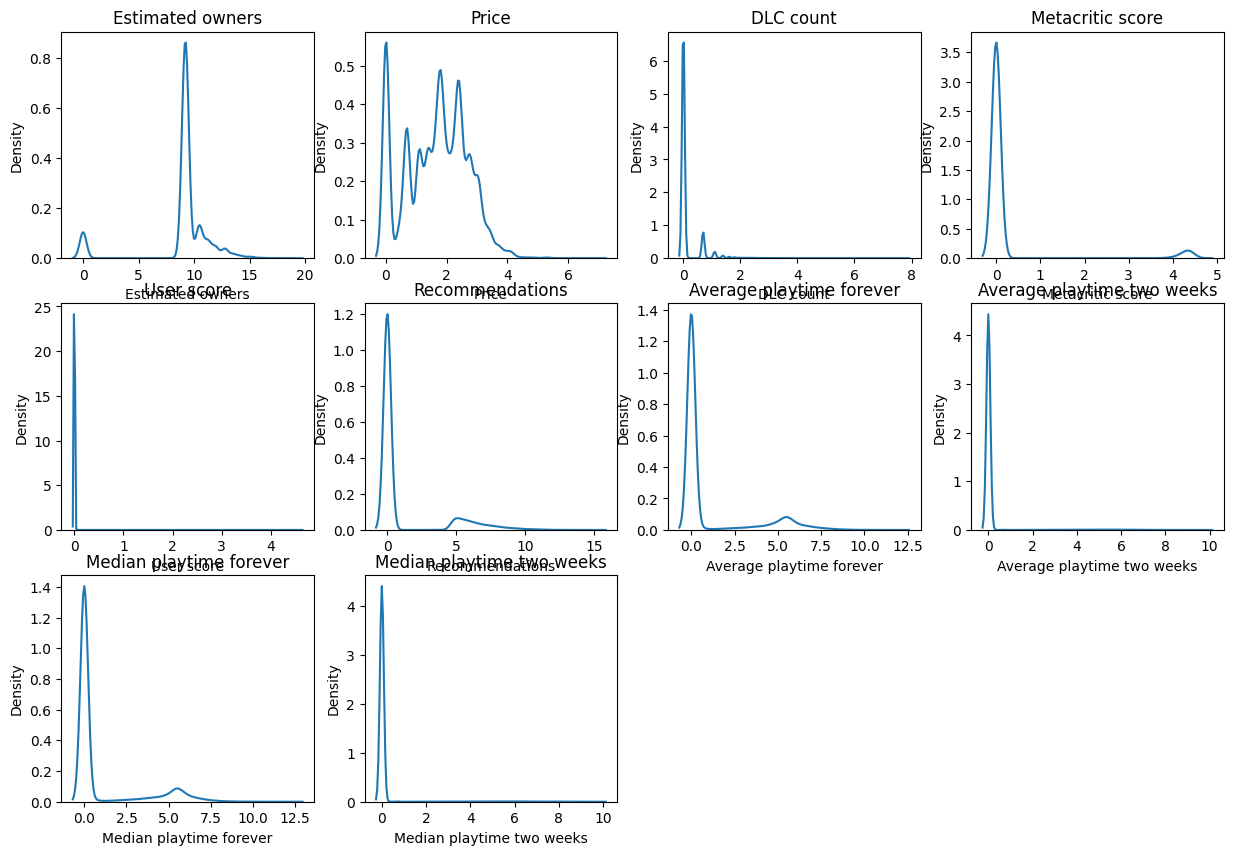

In [24]:
# Plot the distribution of log(numerical_features)
num_features = numerical_features_log.shape[1]
num_rows = 3
num_cols = int(np.ceil(num_features / num_rows))
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))
# Flatten the axes array to iterate easily
axes = axes.flatten()
# Iterate through numerical features and create KDE plots
for i, col in enumerate(numerical_features_log.columns):
    sns.kdeplot(data=numerical_features_log[col], ax=axes[i])
    axes[i].set_title(col)

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])


plt.show()

In [32]:
all_games['windows'].value_counts()

windows
True    490
Name: count, dtype: int64

In [33]:
all_games['linux'].value_counts()

linux
False    382
True     108
Name: count, dtype: int64

In [34]:
all_games['mac'].value_counts()

mac
False    358
True     132
Name: count, dtype: int64

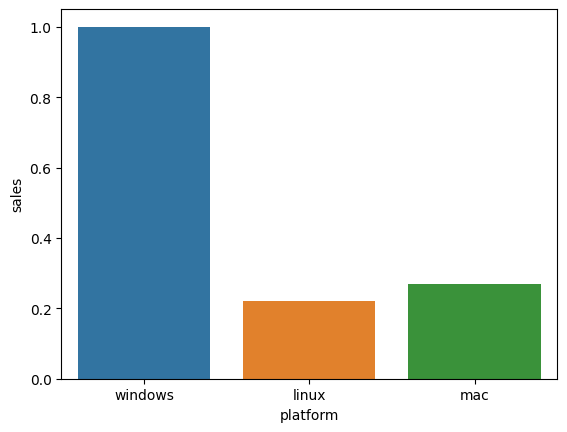

In [49]:
melted_data = all_games.melt(value_vars=['windows', 'linux', 'mac'], var_name='platform', value_name='sales')

sns.barplot(x='platform', y='sales', data=melted_data, errorbar=None, estimator=np.average) 
plt.show()

In [50]:
top_10_games = all_games.nlargest(10, 'global_sales')
print(top_10_games[['name', 'global_sales']])

                              name  global_sales
430             Grand Theft Auto V         57.75
479  Grand Theft Auto: San Andreas         25.79
469    Grand Theft Auto: Vice City         16.19
201     Call of Duty: World at War         15.83
262                      Fallout 4         13.13
473           Grand Theft Auto III         13.11
439                      Fallout 3          9.87
5               Fallout: New Vegas          8.35
302                 Tomb Raider II          7.53
375                      Far Cry 3          7.32
